<a href="https://colab.research.google.com/github/AUBAI-ALKHABBAZ/AUBAI-ALKHABBAZ/blob/main/cluster_image_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np
import cv2
import webcolors
def rgb_to_hex(rgb_color):
  hex_color = "#"
  for i in rgb_color:
    i = int(i)
    hex_color += ("{:02x}".format(i))
  return hex_color


In [2]:
img_name = "/content/appl_test_2.jpeg"
raw_img = cv2.imread(img_name)
raw_img = cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB)
img = cv2.resize(raw_img,(900,600),interpolation = cv2.INTER_AREA)

In [3]:
img = img.reshape(img.shape[0]*img.shape[1],3)

In [4]:
clf = KMeans(n_clusters=5)
color_labels = clf.fit_predict(img)
center_colors = clf.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
count = Counter(color_labels)

In [6]:
ordered_colors = [center_colors[i] for i in count.keys()]
hex_colors = [rgb_to_hex(ordered_colors[i]) for i in count.keys()]

In [ ]:
labels=list(color_labels)
percent=[]
for i in range(len(center_colors)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(round((j*100),1))

In [ ]:
res = {}
for key in hex_colors:
    for value in percent:

        res[key] = value
        percent.remove(value)
        break
 
# Printing resultant dictionary
print("Resultant dictionary is : " + str(res))

Resultant dictionary is : {'#fdfdfd': 69.6, '#54402f': 11.4, '#ae8b6b': 11.2, '#cec9c4': 3.9, '#966949': 3.9}


In [ ]:
def hex_to_rgb(hex):
  rgb = []
  for i in (0, 2, 4):
    decimal = int(hex[i:i+2], 16)
    rgb.append(decimal)
  
  return tuple(rgb)

print(hex_to_rgb('FFA501'))

(255, 165, 1)


In [ ]:
key_max = max(res ,key = lambda x:res[x])
key_max = '#ff0000'
key_max_3 ='#8B0000' 
hex_name = webcolors.hex_to_name(key_max_3)
hex_name_1 = webcolors.hex_to_name(key_max_3)
if hex_name == 'red':
    print(" its a red apple ") 
elif  hex_name_1 == 'darkred':
     print(" its a red darkred ") 


 its a red darkred 


In [ ]:
import webcolors
key_max = '#ff0000' 
#key_max_1 =key_max.split('#')
#named_color = webcolors.rgb_to_name(hex_to_rgb('ff000'), spec='css3')
hex_name = webcolors.hex_to_name(key_max)
#print(named_color)
print(hex_name)


red


['#434053', '#8a707d', '#96caea', '#27232d', '#b9b988']


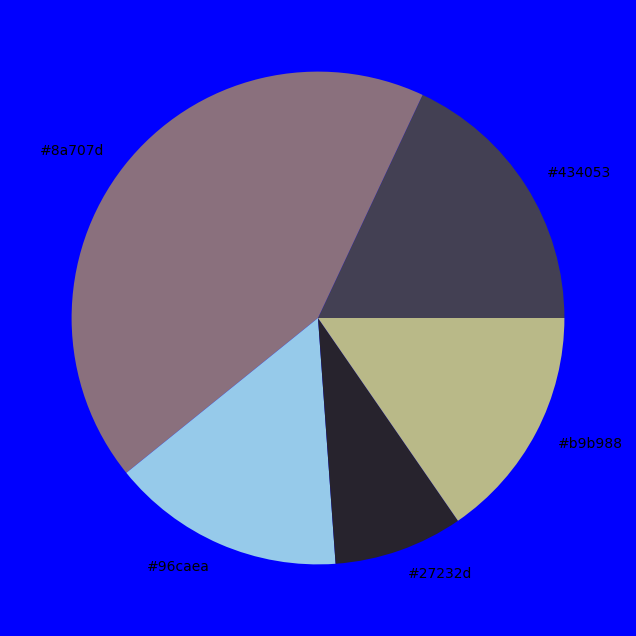

In [10]:
fig =plt.figure(figsize=(12,8))
fig.patch.set_facecolor('blue')

plt.pie(count.values(),labels=hex_colors,colors = hex_colors)
print(hex_colors)

In [11]:
'''import cv2
import sys
import glob
import webcolors
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from collections import Counter
# Source: https://gist.github.com/kb22/f17e59a79d4fcca02188c23cca932be5#file-rgb2hex-py
def rgb2hex(c):
    return "#{:02x}{:02x}{:02x}".format(int(c[0]), int(c[1]), int(c[2]))  # format(int(c[0]), int(c[1]), int(c[2]))


def hex2name(c):
    h_color = '#{:02x}{:02x}{:02x}'.format(int(c[0]), int(c[1]), int(c[2]))
    try:
        nm = webcolors.hex_to_name(h_color, spec='css3')
    except ValueError as v_error:
        print("{}".format(v_error))
        rms_lst = []
        for img_clr, img_hex in webcolors.CSS3_NAMES_TO_HEX.items():
            cur_clr = webcolors.hex_to_rgb(img_hex)
            rmse = np.sqrt(mean_squared_error(c, cur_clr))
            rms_lst.append(rmse)

        closest_color = rms_lst.index(min(rms_lst))

        nm = list(webcolors.CSS3_NAMES_TO_HEX.items())[closest_color][0]
    return nm


img = cv2.imread("/content/rott.jpg")
img2 = img.reshape(img.shape[0] * img.shape[1], 3)
color = KMeans(n_clusters=3)
lbl = color.fit_predict(img2)
cnt = Counter(lbl)
center_color = color.cluster_centers_
ord_color = [center_color[i] for i in cnt.keys()]
hex_color = [rgb2hex(ord_color[i]) for i in cnt.keys()]
lbl_color = [hex2name(ord_color[i]) for i in cnt.keys()]
plt.pie(cnt.values(), labels=lbl_color, colors=hex_color)
plt.show()'''

'import cv2\nimport sys\nimport glob\nimport webcolors\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nfrom sklearn.cluster import KMeans\nfrom sklearn.metrics import mean_squared_error\nfrom collections import Counter\n# Source: https://gist.github.com/kb22/f17e59a79d4fcca02188c23cca932be5#file-rgb2hex-py\ndef rgb2hex(c):\n    return "#{:02x}{:02x}{:02x}".format(int(c[0]), int(c[1]), int(c[2]))  # format(int(c[0]), int(c[1]), int(c[2]))\n\n\ndef hex2name(c):\n    h_color = \'#{:02x}{:02x}{:02x}\'.format(int(c[0]), int(c[1]), int(c[2]))\n    try:\n        nm = webcolors.hex_to_name(h_color, spec=\'css3\')\n    except ValueError as v_error:\n        print("{}".format(v_error))\n        rms_lst = []\n        for img_clr, img_hex in webcolors.CSS3_NAMES_TO_HEX.items():\n            cur_clr = webcolors.hex_to_rgb(img_hex)\n            rmse = np.sqrt(mean_squared_error(c, cur_clr))\n            rms_lst.append(rmse)\n\n        closest_color = rms_lst.index(min(rms_lst))\n\n        nm